In [1]:
## import some basics libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
## Divide the dataset into independent and dependent features

X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [4]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [5]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [6]:
## Ferature Engineering 
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [7]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [8]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [9]:
## concatenate these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)

In [10]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [11]:
X=pd.concat([X,geography,gender],axis=1) 

In [12]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [13]:
#Splitting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
#feature Scaling

from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [15]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [16]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [17]:
X_train.shape

(8000, 11)

In [18]:
## Part 2 Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [19]:
### Lets initialize the ANN
classifier=Sequential()

In [20]:
## Adding the input Layer and first hidden layer
classifier.add(Dense(10,input_shape=(11,),activation='relu'))

In [21]:
classifier

In [22]:
# adding the first hidden layer
classifier.add(Dense(units=10,activation='relu'))
#classifier.add(Dropout(0.2))

In [23]:
##adding the second hidden layer
classifier.add(Dense(units=10,activation='relu'))
#classifier.add(Dropout(0.3))

In [24]:
##  Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [25]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [28]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])


In [27]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [29]:
tensorflow.keras.optimizers.rm

AttributeError: ignored

In [30]:
## Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5
   
)

In [31]:
X_train.shape

(8000, 11)

In [32]:
model_history=classifier.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
800/800 [==============================] - 6s 3ms/step - loss: 0.4277 - accuracy: 0.8135 - val_loss: 0.3732 - val_accuracy: 0.8505
Epoch 2/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3699 - accuracy: 0.8436 - val_loss: 0.3685 - val_accuracy: 0.8505
Epoch 3/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3595 - accuracy: 0.8539 - val_loss: 0.3489 - val_accuracy: 0.8575
Epoch 4/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3515 - accuracy: 0.8596 - val_loss: 0.3575 - val_accuracy: 0.8495
Epoch 5/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3505 - accuracy: 0.8593 - val_loss: 0.3456 - val_accuracy: 0.8595
Epoch 6/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3487 - accuracy: 0.8583 - val_loss: 0.3487 - val_accuracy: 0.8605
Epoch 7/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3451 - accuracy: 0.8589 - val_loss: 0.3454 - val_accuracy: 0.8585

model_history=classifier.fit(X_train,y_train,validation_data=0.33,batch_size=10,epochs=100,callbacks=early_stopping)

In [33]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

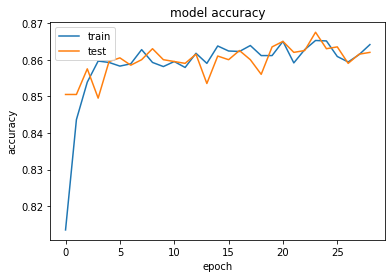

In [34]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

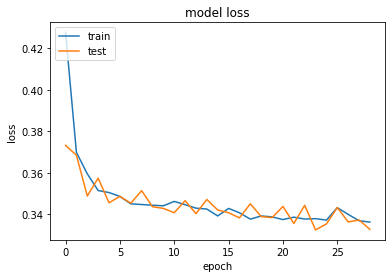

In [35]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

In [37]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1527,   68],
       [ 208,  197]])

In [38]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [39]:
score

0.862

In [40]:
##get the weights
classifier.get_weights()

[array([[-0.07338398, -0.7590598 , -0.23138042,  0.46179354,  0.6752375 ,
         -0.5381755 ,  1.107838  , -0.56431645, -0.22241402, -0.16139211],
        [ 0.6787405 ,  0.5556964 ,  2.6550803 ,  0.8169427 ,  1.0398035 ,
         -2.0032227 , -1.1444606 , -0.6186175 , -3.0975037 , -2.3812    ],
        [-0.13463451,  0.29948634,  0.43863857, -1.1186581 , -0.2567503 ,
          0.476269  ,  0.3313218 ,  0.1838634 ,  0.36755466, -0.56166553],
        [ 2.5797384 , -0.9608463 ,  0.09466799, -0.34117785, -1.0350008 ,
         -0.10012557,  0.19065185,  0.6736586 ,  0.04691774,  1.6227554 ],
        [ 2.8445425 , -4.464712  ,  0.08292937, -1.2515422 , -0.26044387,
          0.7874006 , -0.78435814,  3.3608975 ,  0.25156063, -0.08266994],
        [ 0.12035619,  0.01837868,  0.0368946 ,  0.03755748, -0.09111165,
         -0.3201618 ,  2.2105117 , -0.24462762, -0.00447255,  0.4994076 ],
        [-0.7266521 , -1.3469161 ,  1.6960546 , -0.13999367, -1.9659685 ,
          0.49742442,  1.0681514

In [41]:
## Saving h5 file
classifier.save('model.h5')

In [42]:
##laoding h5 file
from tensorflow import keras
classifier1=keras.models.load_model('model.h5')

In [43]:
classifier1.predict(X_test)

array([[0.23897016],
       [0.2940466 ],
       [0.14056602],
       ...,
       [0.09625209],
       [0.16916749],
       [0.14224425]], dtype=float32)

In [44]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [54]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [55]:
## Regression
## Divide the dataset into independent and dependent features

X=dataset[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember','Exited']]
y=dataset.iloc[:,12]

In [56]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42,2,0.00,1,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,1
3,699,France,Female,39,1,0.00,2,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,0


In [57]:
y

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [58]:
## Ferature Engineering 
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)
## concatenate these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)
X=pd.concat([X,geography,gender],axis=1) 
#Splitting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

#feature Scaling

from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Lets initialize the ANN
regressor=Sequential()
## Adding the input Layer and first hidden layer
regressor.add(Dense(10,input_shape=(11,),activation='relu'))


# adding the first hidden layer
regressor.add(Dense(units=10,activation='relu'))
#regressor.add(Dropout(0.2))

##adding the second hidden layer
regressor.add(Dense(units=10,activation='relu'))
#regressor.add(Dropout(0.3))

##  Adding the output layer
regressor.add(Dense(1))




In [59]:
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                120       
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [60]:
import tensorflow
mse=tensorflow.keras.losses.MeanSquaredError(
    name='mean_squared_error'
)
metrics=tensorflow.keras.metrics.MeanSquaredError(
    name='mean_squared_error', dtype=None
)

In [61]:

regressor.compile(optimizer=opt,loss=mse,metrics=['mae'])

In [62]:
## Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="mae",
    patience=20
   
)

In [63]:
model_history=regressor.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
800/800 [==============================] - 3s 3ms/step - loss: 4018971392.0000 - mae: 53414.9883 - val_loss: 3344730112.0000 - val_mae: 49759.6680
Epoch 2/100
800/800 [==============================] - 2s 2ms/step - loss: 3363740160.0000 - mae: 49910.7734 - val_loss: 3307321600.0000 - val_mae: 49438.6641
Epoch 3/100
800/800 [==============================] - 2s 2ms/step - loss: 3348005632.0000 - mae: 49883.7852 - val_loss: 3314750208.0000 - val_mae: 49607.5469
Epoch 4/100
800/800 [==============================] - 2s 3ms/step - loss: 3338364416.0000 - mae: 49710.9219 - val_loss: 3313557760.0000 - val_mae: 49597.2070
Epoch 5/100
800/800 [==============================] - 2s 3ms/step - loss: 3333732352.0000 - mae: 49759.3086 - val_loss: 3315169536.0000 - val_mae: 49627.4492
Epoch 6/100
800/800 [==============================] - 2s 3ms/step - loss: 3333075968.0000 - mae: 49743.1992 - val_loss: 3308700416.0000 - val_mae: 49472.3047
Epoch 7/100
800/800 [=========================

In [64]:
y_test

9394    192852.67
898     128702.10
2398     75732.25
5906     89368.59
2343    135662.17
          ...    
1037    180969.55
2899     70760.69
9549    141533.19
2740     11276.48
6690    192950.60
Name: EstimatedSalary, Length: 2000, dtype: float64

In [65]:
y_pred=regressor.predict(X_test)

In [66]:
y_pred

array([[110250.12 ],
       [101507.21 ],
       [ 90947.14 ],
       ...,
       [ 97512.84 ],
       [102878.555],
       [108531.77 ]], dtype=float32)

In [67]:
from sklearn.metrics import r2_score

In [68]:
print(r2_score(y_test,y_pred))

-0.007459015568515914


In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10
0,0.169582,-0.464608,0.006661,-1.215717,0.809503,0.642595,-1.032270,-0.506242,-0.569844,1.743090,-1.091687
1,-2.304559,0.301026,-1.377440,-0.006312,-0.921591,0.642595,0.968738,-0.506242,1.754865,-0.573694,0.916013
2,-1.191196,-0.943129,-1.031415,0.579935,-0.921591,0.642595,-1.032270,-0.506242,-0.569844,-0.573694,-1.091687
3,0.035566,0.109617,0.006661,0.473128,-0.921591,0.642595,-1.032270,-0.506242,-0.569844,1.743090,0.916013
4,2.056114,1.736588,1.044737,0.810193,0.809503,0.642595,0.968738,-0.506242,-0.569844,1.743090,-1.091687
...,...,...,...,...,...,...,...,...,...,...,...
7995,-0.582970,-0.656016,-0.339364,0.703104,0.809503,0.642595,0.968738,-0.506242,1.754865,-0.573694,-1.091687
7996,1.478815,-1.613058,-0.339364,0.613060,-0.921591,0.642595,0.968738,-0.506242,-0.569844,1.743090,-1.091687
7997,0.901515,-0.368904,0.006661,1.361474,0.809503,0.642595,-1.032270,-0.506242,-0.569844,-0.573694,0.916013
7998,-0.624205,-0.081791,1.390762,-1.215717,0.809503,0.642595,0.968738,-0.506242,-0.569844,1.743090,-1.091687


In [ ]:
https://www.tensorflow.org/tutorials/keras/regression